# Project: Factors affecting appointment attendance

### Introduction

#### We have a set of variables for patients 'data in addition to whether or not they attend appointments, and in this project we study the factors that have an impact on patients' attendance at their appointments.

##### Q1. What is the effect of reminders on appointment attendance?
##### Q2. What is the effect of the scholarship on appointment attendance?
##### Q3. What is the effect of age on attending the appointment?
##### Q4. Which of the variables is most influencing appointment attendance?

## 1.Fetch and review libraries and file readers

In [53]:
### First we are bringing in the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     
%matplotlib inline
### Then we read the file entitled"pro2", And review the data format
df = pd.read_csv('pro2.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [54]:
### We display the data type and numbers, which show no missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [56]:
df.shape
### we have data for 108285 patients and 14 variable

(110527, 14)

In [57]:
### we need to change the datatype for PatientId and AppointmentID to object
df['PatientId'] = df['PatientId'].astype(object)
df['AppointmentID'] = df['AppointmentID'].astype(object)

In [58]:
df['No_show_num'] = df['No-show'] == "Yes"
df['No_show_num'] = df['No_show_num'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
 14  No_show_num     110527 non-null  int32 
dtypes: int32(1), int64(7), object(7)
memory usage: 12.2+ MB


## 2.Clean up data

In [59]:
### We do not have any duplicated in the data
sum(df.duplicated())

0

In [60]:
### Review descriptive statistics, from which we find two wrong values ( "Age = -1 ")
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_num
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [63]:
### To fix the wrong data issue, we use the following codes, and then we browse the data
df = df[df["Age"] >= 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110526 non-null  object
 1   AppointmentID   110526 non-null  object
 2   Gender          110526 non-null  object
 3   ScheduledDay    110526 non-null  object
 4   AppointmentDay  110526 non-null  object
 5   Age             110526 non-null  int64 
 6   Neighbourhood   110526 non-null  object
 7   Scholarship     110526 non-null  int64 
 8   Hipertension    110526 non-null  int64 
 9   Diabetes        110526 non-null  int64 
 10  Alcoholism      110526 non-null  int64 
 11  Handcap         110526 non-null  int64 
 12  SMS_received    110526 non-null  int64 
 13  No-show         110526 non-null  object
 14  No_show_num     110526 non-null  int32 
dtypes: int32(1), int64(7), object(7)
memory usage: 13.1+ MB


## 3.Graphs

F    71839
M    38687
Name: Gender, dtype: int64

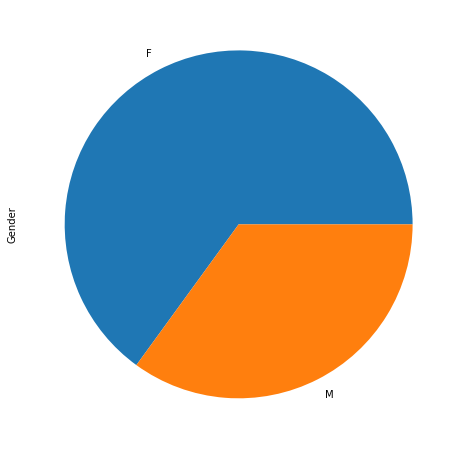

In [64]:
### We see a breakdown of the data by gender
df['Gender'].value_counts().plot(kind='pie',figsize=(8,8));
df['Gender'].value_counts()

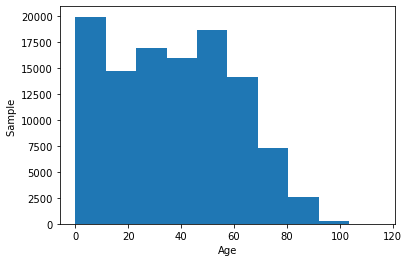

In [65]:
### We see a breakdown of the data by Age
df['Age'].plot(kind='hist',label='Age')
plt.xlabel('Age')
plt.ylabel('Sample ')
plt.show()


0    99665
1    10861
Name: Scholarship, dtype: int64

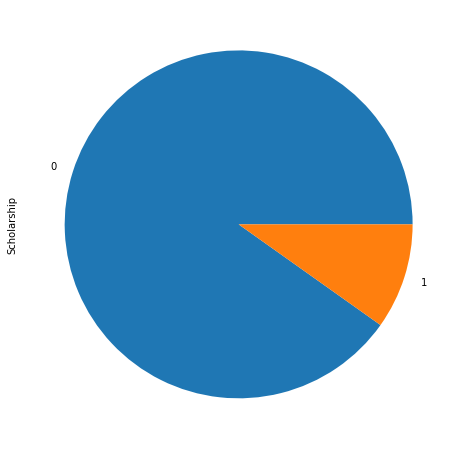

In [66]:
### We see a breakdown of the data by Scholarship
df['Scholarship'].value_counts().plot(kind='pie',figsize=(8,8));
df['Scholarship'].value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

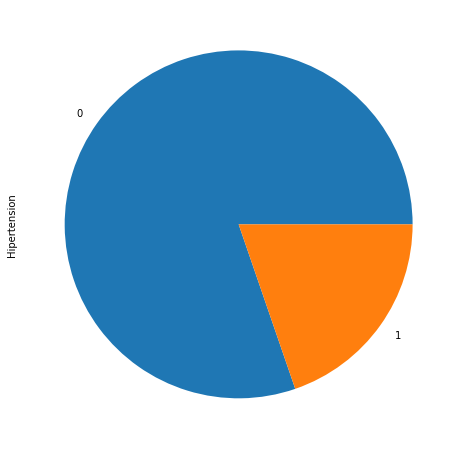

In [67]:
### We see a breakdown of the data by Hipertension
df['Hipertension'].value_counts().plot(kind='pie',figsize=(8,8));
df['Hipertension'].value_counts()

0    100741
1      7544
Name: Diabetes, dtype: int64

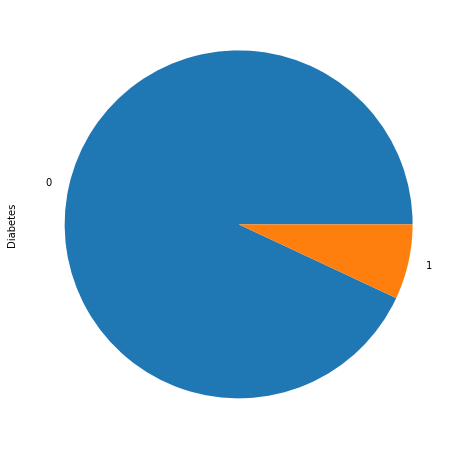

In [104]:
### We see a breakdown of the data by Diabetes
df['Diabetes'].value_counts().plot(kind='pie',figsize=(8,8));
df['Diabetes'].value_counts()

0    105003
1      3282
Name: Alcoholism, dtype: int64

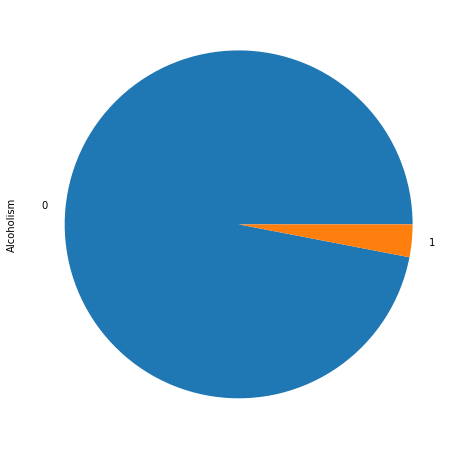

In [105]:
### We see a breakdown of the data by Alcoholism
df['Alcoholism'].value_counts().plot(kind='pie',figsize=(8,8));
df['Alcoholism'].value_counts()

0    73339
1    34946
Name: SMS_received, dtype: int64

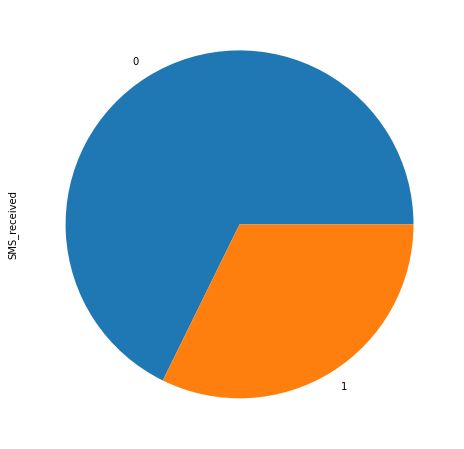

In [106]:
### ### We see a breakdown of the data by SMS_received
df['SMS_received'].value_counts().plot(kind='pie',figsize=(8,8));
df['SMS_received'].value_counts()


No     86373
Yes    21912
Name: No-show, dtype: int64

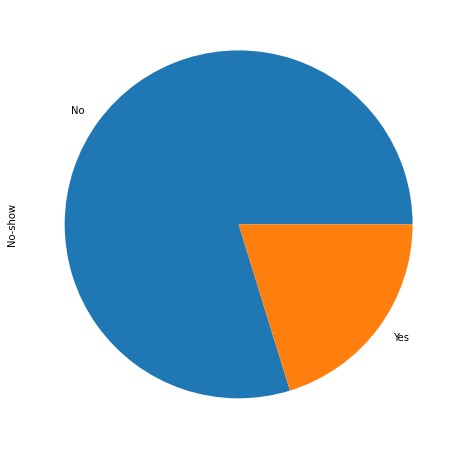

In [107]:
### We see a breakdown of the data by No-show.
df['No-show'].value_counts().plot(kind='pie',figsize=(8,8));
df['No-show'].value_counts()


## 4.Analyze the data

In [26]:
### To study the effect of sending a message sms We divide the data into patients who have been sent messages to them, patients who have not received messages, and who are deaf to make the necessary comparisons.
df_smsyes = df[df['SMS_received'] == 1]
df_smsno = df[df['SMS_received'] == 0]

#### group smsyes=34946 & group smsno=73339


No     25698
Yes     9784
Name: No-show, dtype: int64

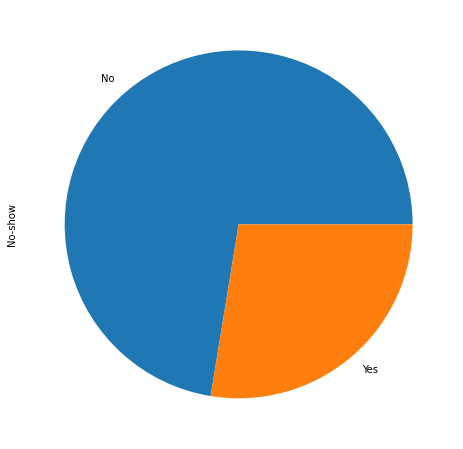

In [27]:
### Now we're looking at the effect of the reminders on attendance for patients
df_smsyes['No-show'].value_counts().plot(kind='pie',figsize=(8,8));
df_smsyes['No-show'].value_counts()


#### We find that the patients who received messages were attended = 9784
#### We find that patients who did not receive messages were attended = 25698

In [70]:
x1= (9784/(25698+9784))*100
print (x1)
### We find that the percentage of patients who attended the appointment and were sent messages sms = 27.61%

27.574544839637


No     62509
Yes    12535
Name: No-show, dtype: int64

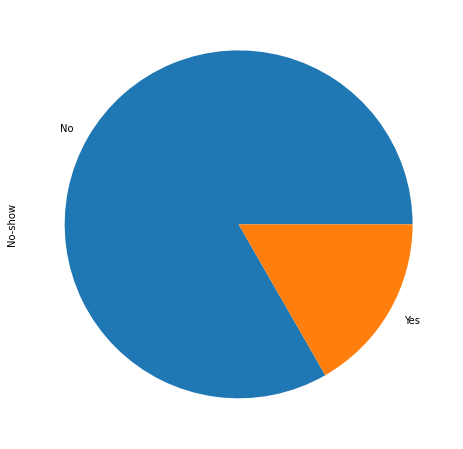

In [29]:
### Now we are examining the effect of not sending a reminder on attendance for patients
df_smsno['No-show'].value_counts().plot(kind='pie',figsize=(8,8));
df_smsno['No-show'].value_counts()

In [71]:
x2= (12535/(62509+12535))*100
print (x2)
### We find that the percentage of patients who attended the appointment and did not receive messages sms 16.72%


16.703533926762965


#### This shows the positive effect of sending messages on patients' attendance for the appointment, as the attendance rate for patients who were sent reminders was 27.57%, while the attendance rate was for patients who did not send reminders is 16.70%, So we can answer "Q1" that reminding patients of their appointments has a positive effect on them coming to the appointment

In [72]:
### To study the effect of having a scholarship on patients attending an appointment, we divide the data into patients who have a scholarship, and patients who do not have a scholarship.
df_showyes = df[df['No-show'] == "Yes"]
df_showno = df[df['No-show'] == "No"]

0    19741
1     2578
Name: Scholarship, dtype: int64

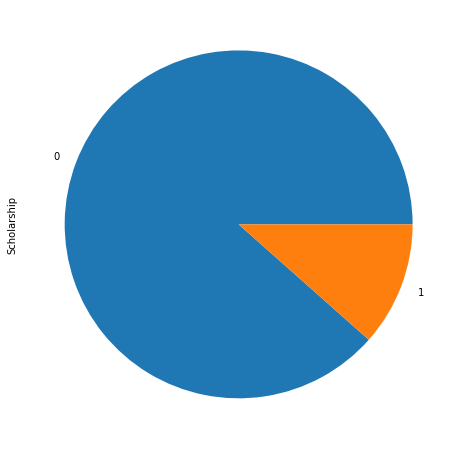

In [46]:
### Now we show the number of patients who attended the appointment according to the scholarship status
df_showyes['Scholarship'].value_counts().plot(kind='pie',figsize=(8,8));
df_showyes['Scholarship'].value_counts()

In [73]:
### We find that the percentage of patients who attend the appointment and have a scholarship
z1=(2578/(19741+2578))*100
print(z1)

11.55069671580268


0    79924
1     8283
Name: Scholarship, dtype: int64

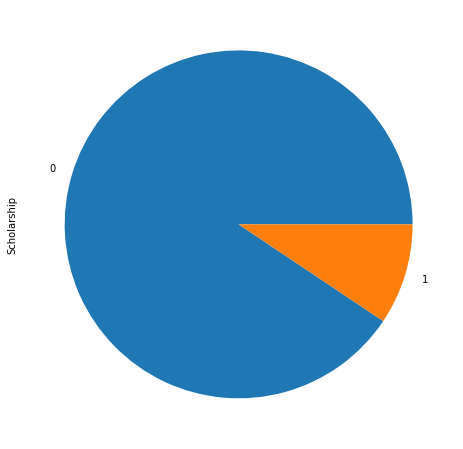

In [74]:
###Now we show the numbers of patients who did not show up for the appointment according to the status of the scholarship
df_showno['Scholarship'].value_counts().plot(kind='pie',figsize=(8,8));
df_showno['Scholarship'].value_counts()

In [75]:
### We find that the percentage of patients who attended the appointment and did not have a scholarship
z2=(8283/(79924+8283))*100
print (z2)

9.390411191855522


#### This shows the very simple positive impact on the attendance rate for patients who have a scholarship, as their percentage reached 11.55% while the patients to them did not have a scholarship 9.39% So we can answer " Q2" that the past who has a scholarship do not differ much in attending their appointments with respect to the sick who do not have a scholarship

In [76]:
### To study the effect of appointment attendance in comparison with patients' ages, we divide the data into the patients who attended the appointment, and the patients who attended the appointment, and then compare
df_showyes = df[df['No-show'] == "No"]
df_showno = df[df['No-show'] == "Yes"]

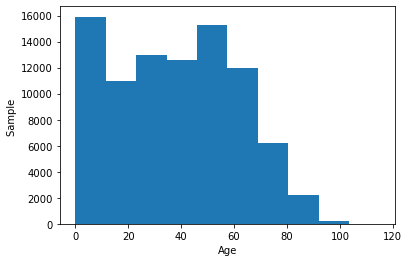

In [77]:
### We see the distribution of ages for those who attended the appointment
df_showyes['Age'].plot(kind='hist',label='Age')
plt.xlabel('Age')
plt.ylabel('Sample ')
plt.show()


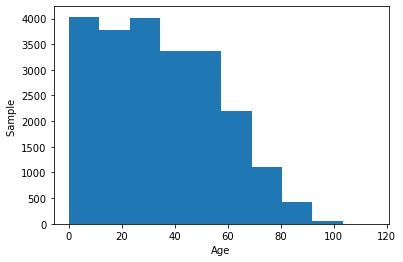

In [78]:
### We see the distribution of ages for those who did not attend the appointment
df_showno['Age'].plot(kind='hist',label='Age')
plt.xlabel('Age')
plt.ylabel('Sample ')
plt.show()


#### We found that attendance is affected by age, as is the case with the patient’s age, the patient’s interest increases with age, and here we can answer the third "Q3" is an effect of the patient’s age on attending the appointment.

In [79]:
### Finding the relationship between the variables, and from us determining the factors most influencing patients' attendance at their appointments a variable
df.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show_num
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,-0.060327
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,0.029134
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,-0.035704
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,-0.015181
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,-0.000197
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,-0.006077
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,0.126428
No_show_num,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.006077,0.126428,1.000000


Text(0.5, 1.0, 'Correlation matrix')

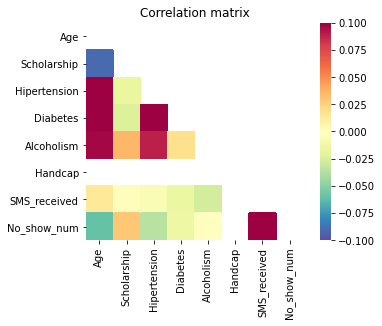

In [135]:
### Red indicates a strong positive relationship and blue indicates a strong inverse relationship.
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.1, vmax=.1)
plt.title('Correlation matrix')


#### To answer "Q4" , we find from the drawing that patients ’attendance at their appointments is greatly affected by sending reminders, and with fewer pictures of the patient’s age.

## Conclusions


### In general, the data is good and there were no major treatments on it, and the presence of problems with 5% what it means is goodand it provides us with some conclusions, but it does not provide an answer to questions such as what is the patient’s financial condition ?, Does the patient have a personal means of transportation ?, What are the reasons for not coming to the appointment? But the data can answer questions: Does having reminders sent to patients affect? Yes, and the patient is more interested in attending appointments as he gets older.

In [50]:
from subprocess import call 
call(['python','-m','nbconvert','Investigate_a_Dataset.ipynd'])


4294967295